In [7]:
import numpy as np
# 設定總共類別
c = 10                    
# 模擬輸出 logits
x = np.random.rand(c) 
# 計算 softmax
exp_x = np.exp(x)
softmax_x = exp_x / np.sum(exp_x)
print(softmax_x)
#print(np.sum(softmax_x))

[0.10201955 0.14666495 0.07321196 0.08269887 0.14466439 0.13684784
 0.08115047 0.07386362 0.06162202 0.09725632]


In [8]:
import numpy as np
# 設定輸入維度
d_in = 10                                
# 設定輸出維度
d_out = 30                               

# 模擬神經網路輸入
x = np.ones((d_in, 1))                   
# 模擬神經網路權重
W = np.random.rand(d_out, d_in) * 10 - 5 
# 模擬神經網路偏差值
b = np.random.rand(d_out, 1) * 10 - 5  
# TODO
# 計算線性輸出
z = np.dot(W, x) + b
# 計算 ReLU Activation
a = np.maximum(z, 0)
print(a)
# 計算總和
#print(np.sum(a))

[[ 0.        ]
 [ 0.        ]
 [21.51006303]
 [ 9.53298274]
 [ 0.        ]
 [ 8.03656009]
 [ 0.        ]
 [15.28441961]
 [ 8.12767968]
 [ 0.        ]
 [20.41557598]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [13.36491097]
 [ 0.        ]
 [ 0.        ]
 [16.78968275]
 [ 0.        ]
 [ 3.75418465]
 [ 0.79597613]
 [ 0.        ]
 [ 0.        ]
 [ 5.06617625]
 [ 0.        ]
 [ 0.        ]
 [ 9.36768254]
 [ 1.56707499]
 [13.10282583]]


In [4]:
import pandas as pd
import numpy as np
#有用的row[0,16,17,21,22,31]
df = pd.read_csv('./data/467410-2022-08.csv')
df.insert(column='UVI level',value='0',loc=32)

df.loc[0,'UVI level'] = 'UVI level'
df.loc[1:,'日最高紫外線指數'] = df.loc[1:,'日最高紫外線指數'].astype(int)

conditions = [
    (df.loc[1:,'日最高紫外線指數'] <= 2),
    (df.loc[1:,'日最高紫外線指數'] <= 5),
    (df.loc[1:,'日最高紫外線指數'] <= 7),
    (df.loc[1:,'日最高紫外線指數'] <= 10)
]

choices = ['低', '中', '高', '甚高']

# 使用 np.select 來替換值
df.loc[1:,'UVI level'] = np.select(conditions, choices, default='極高')
uvi_counts = df.loc[1:,'UVI level'].value_counts()
print(uvi_counts)



# df.loc[:,'降水強度(mm/hour)'].astype(str)

#df.to_csv('new_467410-2022-08.csv', index=False)



UVI level
極高    24
甚高     4
高      2
中      1
Name: count, dtype: int64


In [3]:
import pandas as pd
import numpy as np
#有用的row[0,16,17,21,22,31]
df = pd.read_csv('./data/467410-2022-08.csv')
df.loc[1:,'降水量(mm)'] = df.loc[1:,'降水量(mm)'].replace('T', 0.0)


#df['降水量(mm)'][1:] = df['降水量(mm)'][1:].astype(float)
df.loc[1:,'降水量(mm)'] = df.loc[1:,'降水量(mm)'].astype(float)
df.loc[1:,'降水時數(hour)'] = df.loc[1:,'降水時數(hour)'].astype(float)
df.insert(column='降水強度(mm/hour)',value='0.0',loc=23)

df.loc[0,'降水強度(mm/hour)'] = '降水強度(mm/hour)'
df.loc[1:,'降水強度(mm/hour)'] = df.loc[1:,'降水強度(mm/hour)'].astype(float)
for i in range(1,len(df)):
    if df.loc[i,'降水時數(hour)'] == 0.0:
        df.loc[i,'降水強度(mm/hour)'] = 0.0
    else:
        df.loc[i,'降水強度(mm/hour)'] = df.loc[i,'降水量(mm)'] / df.loc[i,'降水時數(hour)']
#df['降水強度'][1:] = np.where(df['降水時數(hour)'][1:] == 0.0, 0.0, df['降水量(mm)'][1:] / df['降水時數(hour)'][1:])

#df['降水強度'][1:] = df['降水量(mm)'][1:] / df['降水時數(hour)'][1:]
average_intensity = df.loc[1:,'降水強度(mm/hour)'].mean()
#print("Average Intensity:", average_intensity)
for i in range(1,len(df)):
       if df.loc[i,'降水強度(mm/hour)'] > average_intensity:
              print(df.iloc[i])
              print("")

觀測時間(day)                              02
測站氣壓(hPa)                          1005.9
海平面氣壓(hPa)                         1009.0
測站最高氣壓(hPa)                        1008.1
測站最高氣壓時間(LST)         2022/08/02 10:34:00
測站最低氣壓(hPa)                        1003.9
測站最低氣壓時間(LST)         2022/08/02 16:38:00
氣溫(℃)                                27.5
最高氣溫(℃)                              28.9
最高氣溫時間(LST)           2022/08/02 00:01:00
最低氣溫(℃)                              24.6
最低氣溫時間(LST)           2022/08/02 10:35:00
露點溫度(℃)                              24.4
相對溼度(%)                                84
最小相對溼度(%)                              74
最小相對溼度時間(LST)         2022/08/02 01:22:00
風速(m/s)                               1.9
風向(360degree)                         200
最大瞬間風(m/s)                            8.5
最大瞬間風風向(360degree)                    180
最大瞬間風風速時間(LST)        2022/08/02 05:20:00
降水量(mm)                              91.0
降水時數(hour)                            3.6
降水強度(mm/hour)                   25

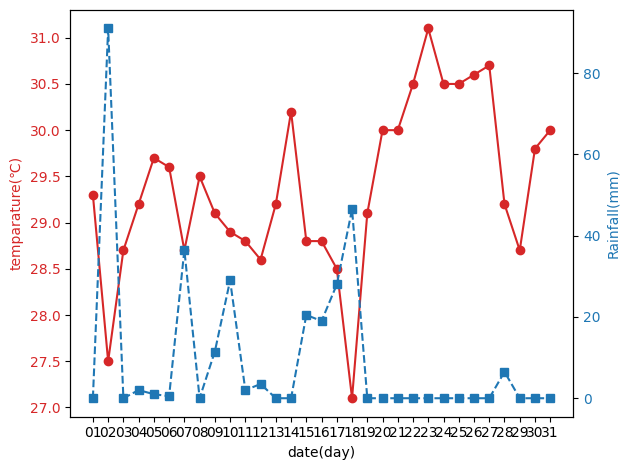

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./data/467410-2022-08.csv')
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('date(day)')
ax1.set_ylabel('temparature(℃)', color=color)
ax1.plot(df.loc[1:,'觀測時間(day)'],df.loc[1:,'氣溫(℃)'].astype(float), marker='o', color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Rainfall(mm)', color=color)
df.loc[1:,'降水量(mm)'] = df.loc[1:,'降水量(mm)'].replace('T', 0.0)
ax2.plot(df.loc[1:,'觀測時間(day)'], df.loc[1:,'降水量(mm)'].astype(float), marker='s', color=color, linestyle='--') 
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

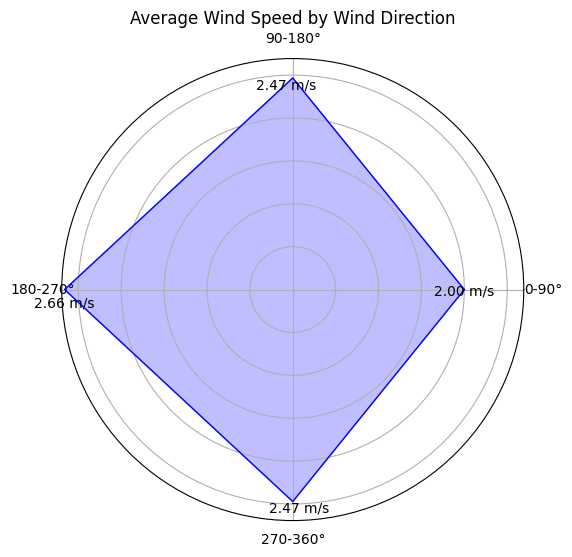

In [4]:
df.loc[1:,'風向(360degree)'] = df.loc[1:,'風向(360degree)'].astype(int)
df.loc[1:,'風速(m/s)'] = df.loc[1:,'風速(m/s)'].astype(float)
wind_direction_intervals = [0, 90, 180, 270, 360]
average_wind_speeds = []
for i in range(len(wind_direction_intervals) - 1):
    lower_bound = wind_direction_intervals[i]
    upper_bound = wind_direction_intervals[i + 1]
    interval_data = []  # Initialize interval_data
    for j in range(1,len(df)):
        if lower_bound <= df.loc[j,'風向(360degree)'] <= upper_bound:
            interval_data.append(df.loc[j,'風速(m/s)'])
    average_wind_speed = sum(interval_data) / len(interval_data)
    average_wind_speeds.append(average_wind_speed)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
angles = np.linspace(0, 2 * np.pi, len(wind_direction_intervals)-1, endpoint=False).tolist()
angles += angles[:1]
for i in range(len(wind_direction_intervals) - 1):
    angle = angles[i]+0.03
    speed = average_wind_speeds[i]
    ax.text(angle, speed, f'{speed:.2f} m/s', ha='center', va='top')
average_wind_speeds += average_wind_speeds[:1]
ax.plot(angles, average_wind_speeds, color='b', linewidth=1)
ax.fill(angles, average_wind_speeds, color='b', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(['0-90°', '90-180°', '180-270°', '270-360°'])
ax.set_yticklabels([])
ax.set_title('Average Wind Speed by Wind Direction')
ax.grid(True)

plt.show()

In [1]:
# 練習 Hint
import pandas as pd
# 匯入填補缺失值的工具
from sklearn.impute import SimpleImputer          
# 匯入 Label Encoder
from sklearn.preprocessing import LabelEncoder    
# 匯入決策樹模型
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier   
# 匯入準確度計算工具
from sklearn.metrics import accuracy_score     
# 匯入 train_test_split 工具
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

df = pd.read_csv('./data/train.csv')

# 取出訓練資料需要分析的資料欄位
df_x = df.loc[:,['Sex', 'Age', 'Fare','Pclass']]        
# 取出訓練資料的答案
df_y = df.loc[:,'Survived']

# 數值型態資料前處理
# 創造 imputer 並設定填補策略
imputer = SimpleImputer(strategy='median')        
age = df_x.loc[:,'Age'].to_numpy().reshape(-1, 1)
# 根據資料學習需要填補的值
imputer.fit(age)                                  
# 填補缺失值
df_x.loc[:,'Age'] = imputer.transform(age)           

# 類別型態資料前處理
# 創造 Label Encoder
le = LabelEncoder()                               
# 給予每個類別一個數值
le.fit(df_x.loc[:,'Sex']) 
                           
# 轉換所有類別成為數值
df_x.loc[:,'Sex'] = le.transform(df_x.loc[:,'Sex'])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 初始化模型
models = {
    "Decision Tree(origin)": DecisionTreeClassifier(random_state=1012,splitter='random'), # "random_state" 是為了讓每次訓練結果一樣
    "Decision Tree(gini)": DecisionTreeClassifier(random_state=1012, criterion='gini',max_depth=10,splitter='random'),
    "Decision Tree(entropy)": DecisionTreeClassifier(random_state=1012,criterion='entropy',max_depth=10,splitter='random'),
    "Random Forest": RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 1012, max_depth=9,bootstrap=True,max_features='sqrt'),
    "SVC Linear": SVC(kernel='linear', random_state=1012,C=1),
}

# 訓練和評估模型
for name, model in models.items():
    model.fit(train_x, train_y)  
    train_pred = model.predict(train_x)
    test_pred = model.predict(test_x)
    train_acc = accuracy_score(train_y, train_pred)             
    test_acc = accuracy_score(test_y, test_pred) 
    print(f"Model: {name}")
    print(f"Train Accuracy: {train_acc}")
    print(f"Test Accuracy: {test_acc}")
    print("")




Model: Decision Tree(origin)
Train Accuracy: 0.9831460674157303
Test Accuracy: 0.7374301675977654

Model: Decision Tree(gini)
Train Accuracy: 0.8904494382022472
Test Accuracy: 0.7932960893854749

Model: Decision Tree(entropy)
Train Accuracy: 0.8806179775280899
Test Accuracy: 0.8044692737430168

Model: Random Forest
Train Accuracy: 0.9241573033707865
Test Accuracy: 0.8268156424581006

Model: SVC Linear
Train Accuracy: 0.7837078651685393
Test Accuracy: 0.7988826815642458

